In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Import
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()

# Mount GDrive
from google.colab import drive

# Modelling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Modelling Metrics
from sklearn import metrics

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.45)


## Import Data 


In [2]:
df_full = pdr.get_data_yahoo("IWDA.AS", start="2018-01-01")

[*********************100%***********************]  1 of 1 downloaded


In [3]:
df_full.shape

(343, 6)

In [4]:
df_full.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,45.395000,45.395000,44.869999,45.165001,45.165001,98762
2018-01-03,45.334999,45.709999,45.305000,45.509998,45.509998,34668
2018-01-04,45.674999,45.799999,45.615002,45.764999,45.764999,52315
2018-01-05,45.869999,46.080002,45.845001,46.080002,46.080002,36390
2018-01-08,46.380001,46.419998,46.250000,46.389999,46.389999,79016


In [5]:
df_full.describe()

,Open,High,Low,Close,Adj Close,Volume
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,47.555423,47.741006,47.343673,47.550831,47.550831,82918.142857
std,2.656283,2.633317,2.676960,2.647191,2.647191,57790.754870
min,42.369999,42.400002,41.720001,41.805000,41.805000,17745.000000
25%,45.674999,45.842500,45.440000,45.690001,45.690001,50792.000000
50%,47.189999,47.349998,47.060001,47.185001,47.185001,71214.000000
75%,49.385000,49.514999,49.182499,49.257500,49.257500,96272.000000
max,53.299999,53.700001,53.084999,53.224998,53.224998,618771.000000


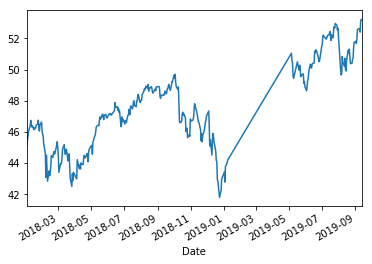

In [6]:
df_full['Adj Close'].plot()

# Data Preprocessing

In [0]:
window_size=32
num_samples=len(df_full)-window_size

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = df_full['Adj Close'].values[indices] # Create the 2D matrix of training samples
x = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day

In [0]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [0]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [10]:
x_test.shape

(63, 32)

## Modeling


In [0]:
#Help Functions
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

### Baseline 

In [0]:
y_pred_lag=np.roll(y_test, 1)

In [13]:
get_performance(y_pred_lag)

Mean Absolute Error: 0.3532
Mean Squared Error: 0.3722
Root Mean Squared Error: 0.6101


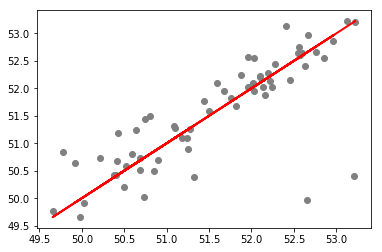

In [14]:
get_plot(y_pred_lag)

### Linear Regression

In [18]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_lr=model_lr.predict(x_test)

In [20]:
get_performance(y_pred_lr)

Mean Absolute Error: 0.4488
Mean Squared Error: 0.3764
Root Mean Squared Error: 0.6135


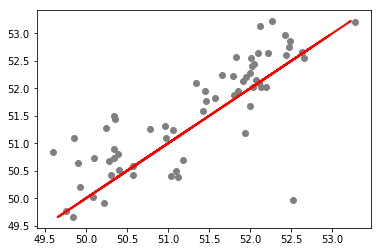

In [21]:
get_plot(y_pred_lr)

### Ridge Regression


In [22]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
y_pred_ridge=model_ridge.predict(x_test)

In [24]:
get_performance(y_pred_ridge)

Mean Absolute Error: 0.4444
Mean Squared Error: 0.3668
Root Mean Squared Error: 0.6056


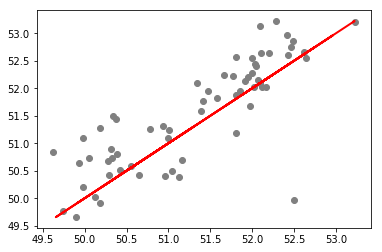

In [25]:
get_plot(y_pred_ridge)

### Lasso Regression

In [30]:
model_lasso = Lasso()
model_lasso.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
y_pred_lasso=model_lasso.predict(x_test)

In [32]:
get_performance(y_pred_lasso)

Mean Absolute Error: 1.4103
Mean Squared Error: 2.1532
Root Mean Squared Error: 1.4674


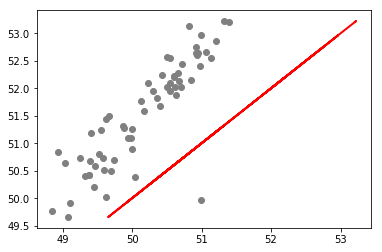

In [33]:
get_plot(y_pred_lasso)